In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("instagram_fake_detection.csv")

In [4]:
df.head()

,Unnamed: 0,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
0,1132,3,76,0,0,1,1,2,12,1
1,921,152,966,0,6,1,0,0,9,0
2,628,319,429,0,68,1,1,0,7,0
3,598,557,703,0,60,1,0,0,11,0
4,479,695,635,25,21,1,0,0,9,0


## Data Preprocessing

In [5]:
df.shape

(1194, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           1194 non-null   int64
 1   userFollowerCount    1194 non-null   int64
 2   userFollowingCount   1194 non-null   int64
 3   userBiographyLength  1194 non-null   int64
 4   userMediaCount       1194 non-null   int64
 5   userHasProfilPic     1194 non-null   int64
 6   userIsPrivate        1194 non-null   int64
 7   usernameDigitCount   1194 non-null   int64
 8   usernameLength       1194 non-null   int64
 9   isFake               1194 non-null   int64
dtypes: int64(10)
memory usage: 93.4 KB


In [7]:
df.describe()

,Unnamed: 0,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
count,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000
mean,596.500000,369.095477,744.261307,22.847571,57.596315,0.922948,0.657454,0.495812,11.123953,0.167504
std,344.822418,372.775741,1032.526420,33.492868,107.402157,0.266786,0.474760,1.212010,2.998135,0.373582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,298.250000,152.000000,267.000000,0.000000,3.000000,1.000000,0.000000,0.000000,9.000000,0.000000
50%,596.500000,304.000000,449.000000,7.000000,20.000000,1.000000,1.000000,0.000000,11.000000,0.000000
75%,894.750000,481.000000,711.000000,33.000000,67.000000,1.000000,1.000000,0.000000,13.000000,0.000000
max,1193.000000,4492.000000,7497.000000,150.000000,1058.000000,1.000000,1.000000,10.000000,30.000000,1.000000


<AxesSubplot:>

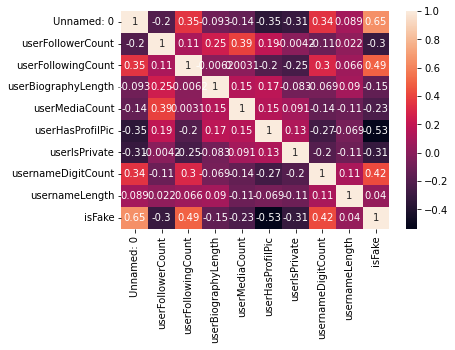

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
df.isna().sum()

Unnamed: 0             0
userFollowerCount      0
userFollowingCount     0
userBiographyLength    0
userMediaCount         0
userHasProfilPic       0
userIsPrivate          0
usernameDigitCount     0
usernameLength         0
isFake                 0
dtype: int64

In [10]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

<AxesSubplot:ylabel='isFake'>

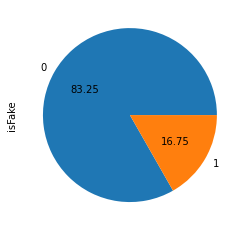

In [11]:
df['isFake'].value_counts().plot(kind='pie',autopct="%.2f")

## Feature Scaling

In [12]:
#df.columns

In [13]:
#columns_to_scale = ['userFollowerCount', 'userFollowingCount', 'userBiographyLength',
#       'userMediaCount', 'usernameDigitCount', 'usernameLength']

In [14]:
#from sklearn.preprocessing import MinMaxScaler

In [15]:
#scaler = MinMaxScaler()

In [16]:
#df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [17]:
X = df.drop(['isFake'],axis=1)
Y = df['isFake']

In [18]:
X.head()

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength
0,3,76,0,0,1,1,2,12
1,152,966,0,6,1,0,0,9
2,319,429,0,68,1,1,0,7
3,557,703,0,60,1,0,0,11
4,695,635,25,21,1,0,0,9


In [19]:
Y

0       1
1       0
2       0
3       0
4       0
       ..
1189    0
1190    0
1191    0
1192    1
1193    1
Name: isFake, Length: 1194, dtype: int64

### Over Sampling the data using SMOTE Method

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
smote = SMOTE(sampling_strategy='minority')
X,Y = smote.fit_resample(X,Y)
X.shape,Y.shape

((1988, 8), (1988,))

<AxesSubplot:ylabel='isFake'>

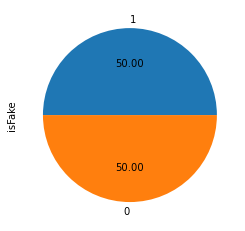

In [22]:
Y.value_counts().plot(kind='pie',autopct="%.2f")

In [23]:
df.to_csv('insta_fake_account_dectection_modified.csv')

### Train and Test Data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1391, 8), (597, 8), (1391,), (597,))

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [28]:
cv=ShuffleSplit(n_splits=10,random_state=42,test_size=0.3)

# XGB Classifer

In [29]:
from xgboost import XGBClassifier
cross_val_score(XGBClassifier(),x_train,y_train,cv=cv,scoring='accuracy')

array([0.96650718, 0.97368421, 0.97129187, 0.9784689 , 0.9784689 ,
       0.9784689 , 0.96411483, 0.98086124, 0.98803828, 0.96889952])

In [30]:
classifier = XGBClassifier()
classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [31]:
# make predictions for test data
y_pred = classifier.predict(x_test)
predictions = [round(value) for value in y_pred]

In [32]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
a=accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.32%


# AdaBoost Classifier

In [33]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = classifier.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
b=accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.65%


# Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
cross_val_score(DecisionTreeClassifier(),X,Y,scoring='accuracy',cv=cv)

array([0.95309883, 0.96649916, 0.96147404, 0.96984925, 0.95309883,
       0.9681742 , 0.96314908, 0.9798995 , 0.97152429, 0.98157454])

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [37]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
c=accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.32%


# Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score(RandomForestClassifier(),X,Y,scoring='accuracy',cv=cv)

array([0.96649916, 0.97487437, 0.97822446, 0.97654941, 0.98157454,
       0.97654941, 0.97319933, 0.98157454, 0.98324958, 0.9798995 ])

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
d=accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.16%


In [42]:
import sklearn
from sklearn import ensemble
from sklearn import tree
from sklearn import svm

import seaborn as sns

model = [
    ensemble.AdaBoostClassifier(),
    ensemble.RandomForestClassifier(),     
    tree.DecisionTreeClassifier(),
    ensemble.ExtraTreesClassifier(),
    svm.SVC(probability=True),
    svm.LinearSVC(),
    
    ]

In [43]:
from sklearn.metrics import precision_score,recall_score
from sklearn import metrics
model_columns = []
model_compare = pd.DataFrame(columns = model_columns)

row_index = 0
for alg in model: 
    predicted = alg.fit(x_train, y_train).predict(x_test)
    model_compare.loc[row_index, 'model Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    model_compare.loc[row_index, 'model Precission'] = precision_score(y_test, predicted)
    model_compare.loc[row_index, 'model Recall'] = recall_score(y_test, predicted)
    
model_compare.sort_values(by = ['model Test Accuracy'], ascending = False, inplace = True)    
model_compare

,model Test Accuracy,model Precission,model Recall
0,0.9363,0.952218,0.920792


Text(0.5, 1.0, 'model Acurracy Comparison')

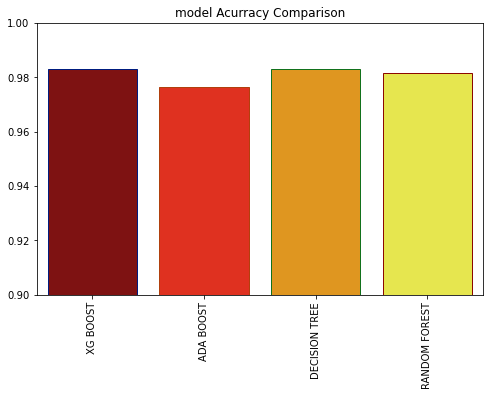

In [44]:
plt.subplots(figsize=(8,5))
data=[a,b,c,d]

label=['XG BOOST','ADA BOOST','DECISION TREE','RANDOM FOREST']
sns.barplot(x=label,y=data,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.ylim([0.9,1])
plt.title('model Acurracy Comparison')

Text(0.5, 1.0, 'model Recall Comparison')

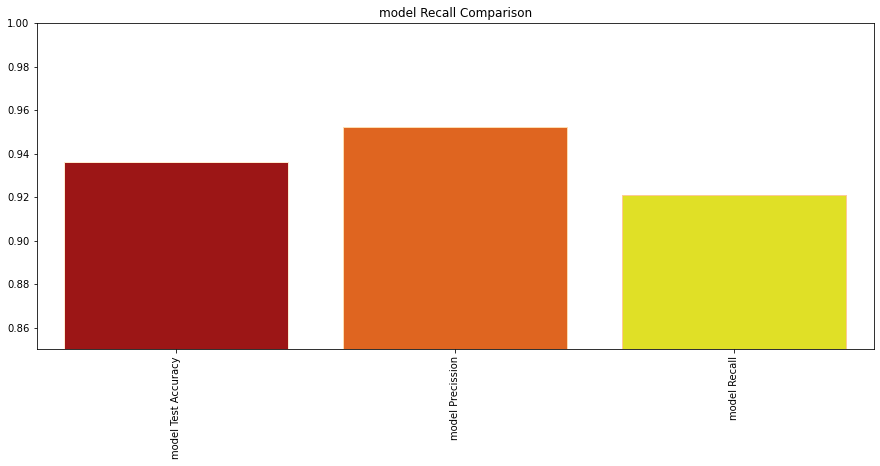

In [45]:
plt.subplots(figsize=(15,6))
sns.barplot(data=model_compare,palette='hot',edgecolor=sns.color_palette('OrRd',9))
plt.xticks(rotation=90)
plt.ylim([0.85,1])
plt.title('model Recall Comparison')